In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# DETECTOR MSER

In [3]:
imgname = 'img/Problema1.jpg'
imgMSER = cv2.imread(imgname)
grayMSER = cv2.cvtColor(imgMSER, cv2.COLOR_BGR2GRAY)

mser = cv2.MSER_create()

coordinates, bboxes = mser.detectRegions(grayMSER)

In [4]:
coords = []
for coord, bbox in zip(coordinates, bboxes):
    x,y,w,h = bbox
    if w< 10 or h < 10 or w/h > 5 or h/w > 5:
        continue
    coords.append(coord)
print( "Regiones Detectadas usando MSER Detector : {}".format(len(coordinates)))

Regiones Detectadas usando MSER Detector : 854


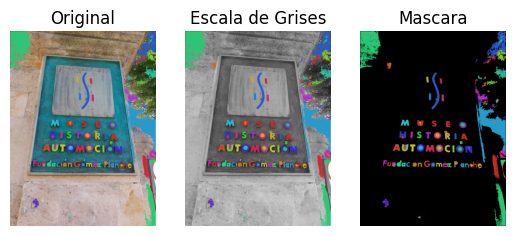

In [6]:
colors = [[43, 43, 200], [43, 75, 200], [43, 106, 200], [43, 137, 200],
[43, 169, 200], [43, 200, 195], [43, 200, 163], [43, 200, 132],
[43, 200, 101], [43, 200, 69], [54, 200, 43], [85, 200, 43],
[116, 200, 43], [148, 200, 43], [179, 200, 43], [200, 184, 43],
[200, 153, 43], [200, 122, 43], [200, 90, 43], [200, 59, 43],
[200, 43, 64], [200, 43, 95], [200, 43, 127], [200, 43, 158],
[200, 43, 190], [174, 43, 200], [142, 43, 200], [111, 43, 200],
[80, 43, 200], [43, 43, 200]]

np.random.seed(0)
canvas1 = imgMSER.copy()
canvas2 = cv2.cvtColor(grayMSER, cv2.COLOR_GRAY2BGR)
canvas3 = np.zeros_like(imgMSER)

for cnt in coords:
    xx = cnt[:,0]
    yy = cnt[:,1]
    color = colors[np.random.choice(len(colors))]
    canvas1[yy, xx] = color
    canvas2[yy, xx] = color
    canvas3[yy, xx] = color

plt.subplot(131)
plt.imshow(canvas1[:, :, ::-1])
plt.title('Original')
plt.axis('off')
plt.subplot(132)
plt.imshow(canvas2[:, :, ::-1])
plt.title('Escala de Grises')
plt.axis('off')
plt.subplot(133)
plt.imshow(canvas3[:, :, ::-1])
plt.title('Mascara')
plt.axis('off')
plt.savefig("out/MSER_Result.png", dpi=600, transparent=True)
plt.show()



# DETECTOR FAST

Threshold: 15
nonmaxSuppression:True
vecindario: 2
Keypoints Totales con nonmaxSuppression: 9831
Keypoints Totales sin nonMaxSuppression: 38587


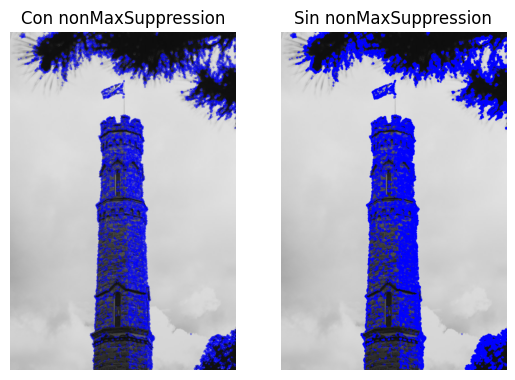

In [5]:
imgFast = cv2.imread('img/tower2.jpg',0)

thre = 15
fast = cv2.FastFeatureDetector_create(thre)

kp = fast.detect(imgFast,None)
imgFast2 = cv2.drawKeypoints(imgFast, kp, None, color=(255,0,0))

print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "vecindario: {}".format(fast.getType()) )
print( "Keypoints Totales con nonmaxSuppression: {}".format(len(kp)) )
cv2.imwrite('out/fast_true.png',imgFast2)

fast.setNonmaxSuppression(0)
kp = fast.detect(imgFast,None)
print( "Keypoints Totales sin nonMaxSuppression: {}".format(len(kp)) )
imgFast3 = cv2.drawKeypoints(imgFast, kp, None, color=(255,0,0))
cv2.imwrite('out/fast_false.png',imgFast3)
plt.subplot(121)
plt.imshow(imgFast2[:, :, ::-1])
plt.title('Con nonMaxSuppression')
plt.axis('off')
plt.subplot(122)
plt.imshow(imgFast3[:, :, ::-1])
plt.title('Sin nonMaxSuppression')
plt.axis('off')
plt.show()


# DETECTOR ORB

Keypoints Totales Usando ORB Detector : 500


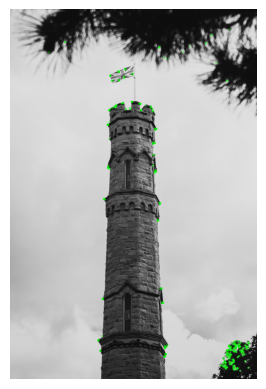

In [6]:
imgORB = cv2.imread('img/tower2.jpg',0)

orb = cv2.ORB_create(nfeatures = 500)

kp = orb.detect(imgORB,None)

imgORB2 = cv2.drawKeypoints(imgORB, kp, None, color=(0,255,0), flags=0)
print( "Keypoints Totales Usando ORB Detector : {}".format(len(kp)) )
plt.imshow(imgORB2[:, :, ::-1] )
plt.axis('off')
plt.savefig("out/ORB_KP.png", dpi=600, orientation='portrait', transparent=True)
plt.show()


# Seccion 1

Regiones Detectadas usando MSER Detector : 1664


(-0.5, 799.5, 1199.5, -0.5)

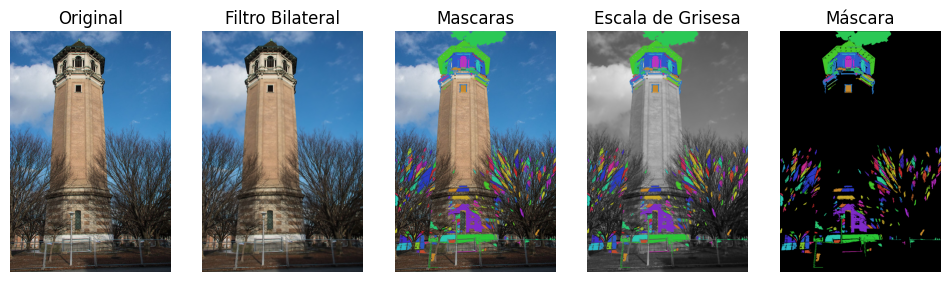

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgname = 'img/tower3.jpg'
original = cv2.imread(imgname)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
imgMSER = cv2.imread(imgname)
bilateral_filtered = cv2.bilateralFilter(imgMSER, d=9, sigmaColor=75, sigmaSpace=75)
grayMSER = cv2.cvtColor(bilateral_filtered, cv2.COLOR_BGR2GRAY)

mser = cv2.MSER_create()

coordinates, bboxes = mser.detectRegions(grayMSER)

coords = []
for coord, bbox in zip(coordinates, bboxes):
    x, y, w, h = bbox
    if w < 10 or h < 10 or w / h > 5 or h / w > 5:
        continue
    coords.append(coord)
print("Regiones Detectadas usando MSER Detector : {}".format(len(coordinates)))

colors = [[43, 43, 200], [43, 75, 200], [43, 106, 200], [43, 137, 200],
          [43, 169, 200], [43, 200, 195], [43, 200, 163], [43, 200, 132],
          [43, 200, 101], [43, 200, 69], [54, 200, 43], [85, 200, 43],
          [116, 200, 43], [148, 200, 43], [179, 200, 43], [200, 184, 43],
          [200, 153, 43], [200, 122, 43], [200, 90, 43], [200, 59, 43],
          [200, 43, 64], [200, 43, 95], [200, 43, 127], [200, 43, 158],
          [200, 43, 190], [174, 43, 200], [142, 43, 200], [111, 43, 200],
          [80, 43, 200], [43, 43, 200]]

np.random.seed(0)
canvas1 = imgMSER.copy()
canvas2 = cv2.cvtColor(grayMSER, cv2.COLOR_GRAY2BGR)
canvas3 = np.zeros_like(imgMSER)
canvas4 = bilateral_filtered.copy() 

for cnt in coords:
    xx = cnt[:, 0]
    yy = cnt[:, 1]
    color = colors[np.random.choice(len(colors))]
    canvas1[yy, xx] = color
    canvas2[yy, xx] = color
    canvas3[yy, xx] = color

cv2.imwrite("out/bilateral_filtered.png", bilateral_filtered)

plt.figure(figsize=(12, 5))

plt.subplot(151)
plt.imshow(original)
plt.title('Original')
plt.axis('off')

plt.subplot(153)
plt.imshow(canvas1[:, :, ::-1])  
plt.title('Mascaras')
plt.axis('off')

plt.subplot(154)
plt.imshow(canvas2[:, :, ::-1]) 
plt.title('Escala de Grisesa')
plt.axis('off')

plt.subplot(155)
plt.imshow(canvas3[:, :, ::-1])
plt.title('Máscara')
plt.axis('off')

plt.subplot(152)
plt.imshow(bilateral_filtered[:, :, ::-1])
plt.title('Filtro Bilateral')
plt.axis('off')

## FAST

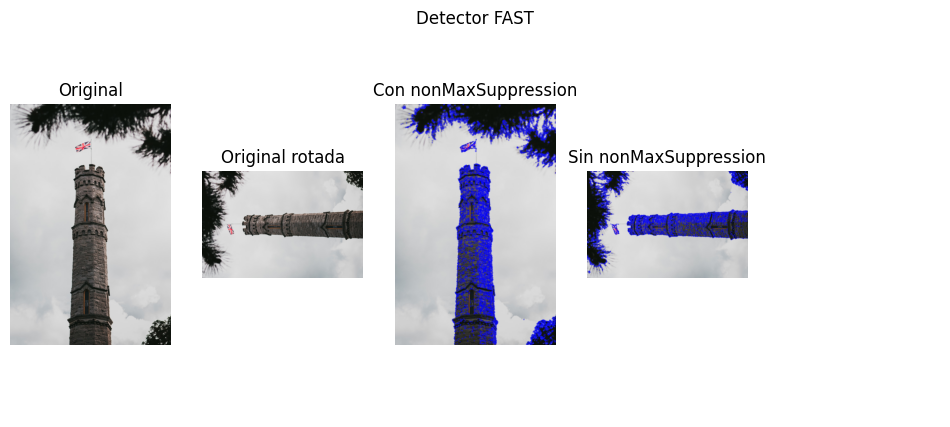

In [8]:
import cv2
import matplotlib.pyplot as plt

imgOriginal = cv2.imread('img/tower2.jpg')
imageRot = cv2.rotate(imgOriginal, cv2.ROTATE_90_COUNTERCLOCKWISE)
thre = 15
fast = cv2.FastFeatureDetector_create(thre)

kpOriginal = fast.detect(imgOriginal, None)

imgOriginalWithKeypoints = cv2.drawKeypoints(imgOriginal, kpOriginal, None, color=(255, 0, 0))

imageRot = cv2.rotate(imgOriginal, cv2.ROTATE_90_COUNTERCLOCKWISE)


kpRotated = fast.detect(imageRot, None)

imgRotatedWithKeypoints = cv2.drawKeypoints(imageRot, kpRotated, None, color=(255, 0, 0))

plt.figure(figsize=(12, 5))
plt.title('Detector FAST')
plt.axis('off')

plt.subplot(151)
plt.imshow(cv2.cvtColor(imgOriginal, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(152)
plt.imshow(cv2.cvtColor(imageRot, cv2.COLOR_BGR2RGB))
plt.title('Original rotada')
plt.axis('off')

plt.subplot(153)
plt.imshow(imgOriginalWithKeypoints[:, :, ::-1])
plt.title('Con nonMaxSuppression')
plt.axis('off')

plt.subplot(154)
plt.imshow(imgRotatedWithKeypoints[:, :, ::-1])
plt.title('Sin nonMaxSuppression')
plt.axis('off')

plt.show()

## ORB

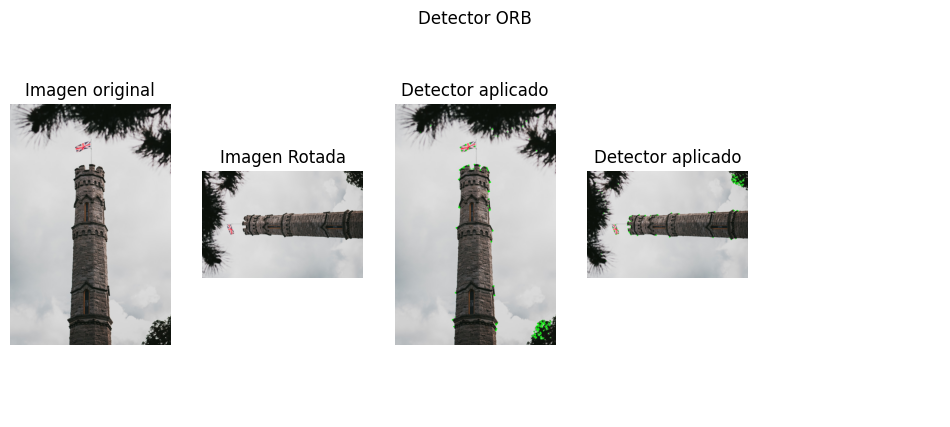

In [9]:
imgORB = cv2.imread('img/tower2.jpg')
imageRot = cv2.rotate(imgORB, cv2.ROTATE_90_COUNTERCLOCKWISE)

orb = cv2.ORB_create(nfeatures = 500)

kp = orb.detect(imgORB,None)
kp2 = orb.detect(imageRot,None)

imgORB2 = cv2.drawKeypoints(imgORB, kp, None, color=(0,255,0), flags=0)
imgORB90 = cv2.drawKeypoints(imageRot, kp2, None, color=(0,255,0), flags=0)

plt.figure(figsize=(12, 5))
plt.title('Detector ORB')
plt.axis('off')

plt.subplot(151)
plt.imshow(cv2.cvtColor(imgORB, cv2.COLOR_BGR2RGB))
plt.title('Imagen original')
plt.axis('off')

plt.subplot(153)
plt.imshow(imgORB2[:, :, ::-1])
plt.title('Detector aplicado')
plt.axis('off')

plt.subplot(154)
plt.imshow(imgORB90[:, :, ::-1])
plt.title('Detector aplicado')
plt.axis('off')


plt.subplot(152)
plt.imshow(cv2.cvtColor(imageRot, cv2.COLOR_BGR2RGB))
plt.title('Imagen Rotada')
plt.axis('off')
plt.show()


# DESCRIPTOR BRISK

In [10]:
def show_img_ply(bins, val, pos):
    plt.subplot(3,4,pos)
    plt.bar(bins, val, width = 0.6, color='#0504aa',alpha=0.7)
    plt.xlim(min(bins), max(bins))

imgORB = cv2.imread('img/tower2.jpg')

orb = cv2.ORB_create(nfeatures = 2500, edgeThreshold = 73, nlevels=18)

kpORB, desORB = orb.detectAndCompute(imgORB, None)

bins = list(range(desORB.shape[1]))
fig, axs = plt.subplots(3,4, figsize=(15,10), sharex='col', sharey='row')
fig.suptitle("ORB Detector -Descriptor.",fontsize=19, va='top')
for i in range(12):
    val = desORB[i]
    pos = i+1
    show_img_ply(bins, val, pos )
    if(i == 11):
        plt.savefig("out/ORB_Det_Desc_Histograma.png",
        dpi=350, bbox_inches='tight')
plt.show()

# Dibujar los Keypoints

imgORB2 = cv2.drawKeypoints(imgORB,kpORB,np.array([]),
color=(0,5,255), flags=0)
cv2.imwrite("out/Tower_ORB.png", imgORB2)
plt.imshow(imgORB2[:, :, ::-1])
plt.show()


# KAZE

In [ ]:
imgKaze = cv2.imread('img/tower2.png')

grayKaze = cv2.cvtColor(imgKaze, cv2.COLOR_BGR2GRAY)

detectorKaze = cv2.KAZE_create()
keypointsKaze, descriptorsKaze = detectorKaze.detectAndCompute(grayKaze, None)

print(f'N´umero de puntos clave detectados.: {len(keypointsKaze)}')
print(f'Dimensiones del vector de features: {descriptorsKaze.shape}')

#Preparar Salida
bins = list(range(descriptorsKaze.shape[1]))
fig, axs = plt.subplots(3,4, figsize=(15,10), sharex='col', sharey='row')
fig.suptitle("KAZE Detec KAZE Desc.",fontsize=19, va='top')
for i in range(12):
    val= descriptorsKaze[i]
    pos = i+1
    show_img_ply(bins, val, pos )
    if(i == 11):
        plt.savefig("out/KAZE_Det_KAZE_Des_Histograma.png",
        dpi=350, bbox_inches='tight')
plt.show()
# Dibujar los Keypoints
imgKaze2 = cv2.drawKeypoints(imgKaze,keypointsKaze,np.array([]),
color=(0,5,255), flags=0)
cv2.imwrite("out/Tower_KAZE.png", imgKaze2)
plt.imshow(imgKaze2[:, :, ::-1])
plt.show()

# DESCRIPTOR BRISK

Numero de puntos clave detectados.: 5964
Dimensiones del vector de features: (5964, 64)


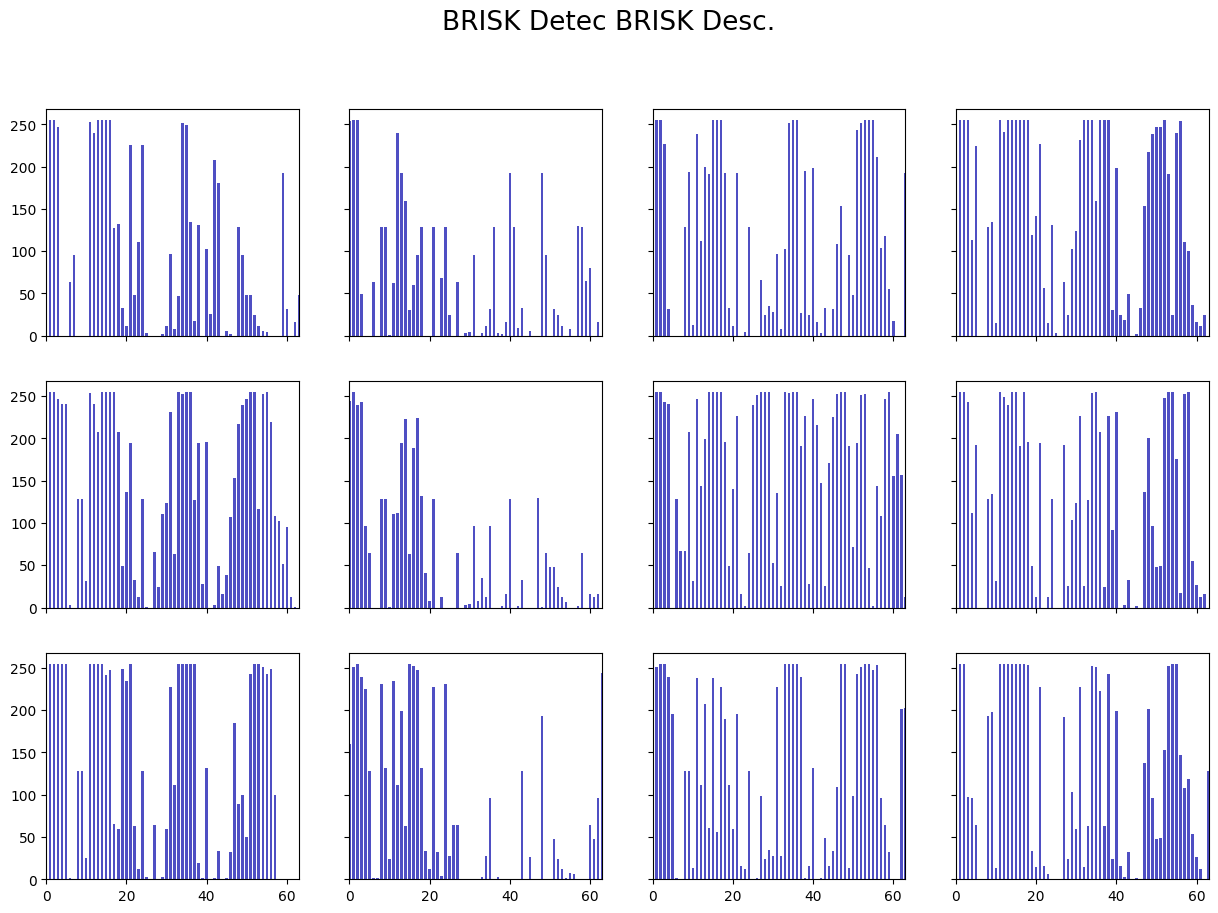

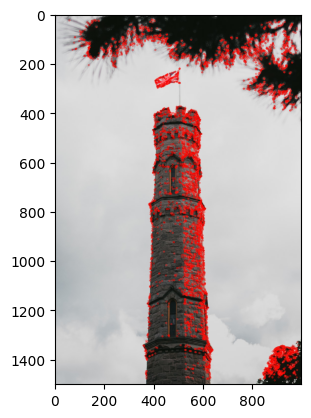

In [ ]:
imgBrisk = cv2.imread('img/tower2.jpg')

grayBrisk = cv2.cvtColor(imgBrisk, cv2.COLOR_BGR2GRAY)

detectorBrisk = cv2.BRISK_create()
keypointsBrisk, descriptorsBrisk = detectorBrisk.detectAndCompute(grayBrisk, None)

print(f'Numero de puntos clave detectados.: {len(keypointsBrisk)}')
print(f'Dimensiones del vector de features: {descriptorsBrisk.shape}')
#Preparar Salida
bins = list(range(descriptorsBrisk.shape[1]))
fig, axs = plt.subplots(3,4, figsize=(15,10), sharex='col', sharey='row')
fig.suptitle("BRISK Detec BRISK Desc.",fontsize=19, va='top')
for i in range(12):
    val= descriptorsBrisk[i]
    pos = i+1
    show_img_ply(bins, val, pos )
    if(i == 11):
        plt.savefig("out/BRISK_Det_BRISK_Des_Histograma.png",
        dpi=350, bbox_inches='tight')
plt.show()
# Dibujar los Keypoints
imgBrisk2 = cv2.drawKeypoints(imgBrisk,keypointsBrisk,np.array([]),
color=(0,5,255), flags=0)
cv2.imwrite("out/Tower_BRISK.png", imgBrisk2)
plt.imshow(imgBrisk2[:, :, ::-1])
plt.show()

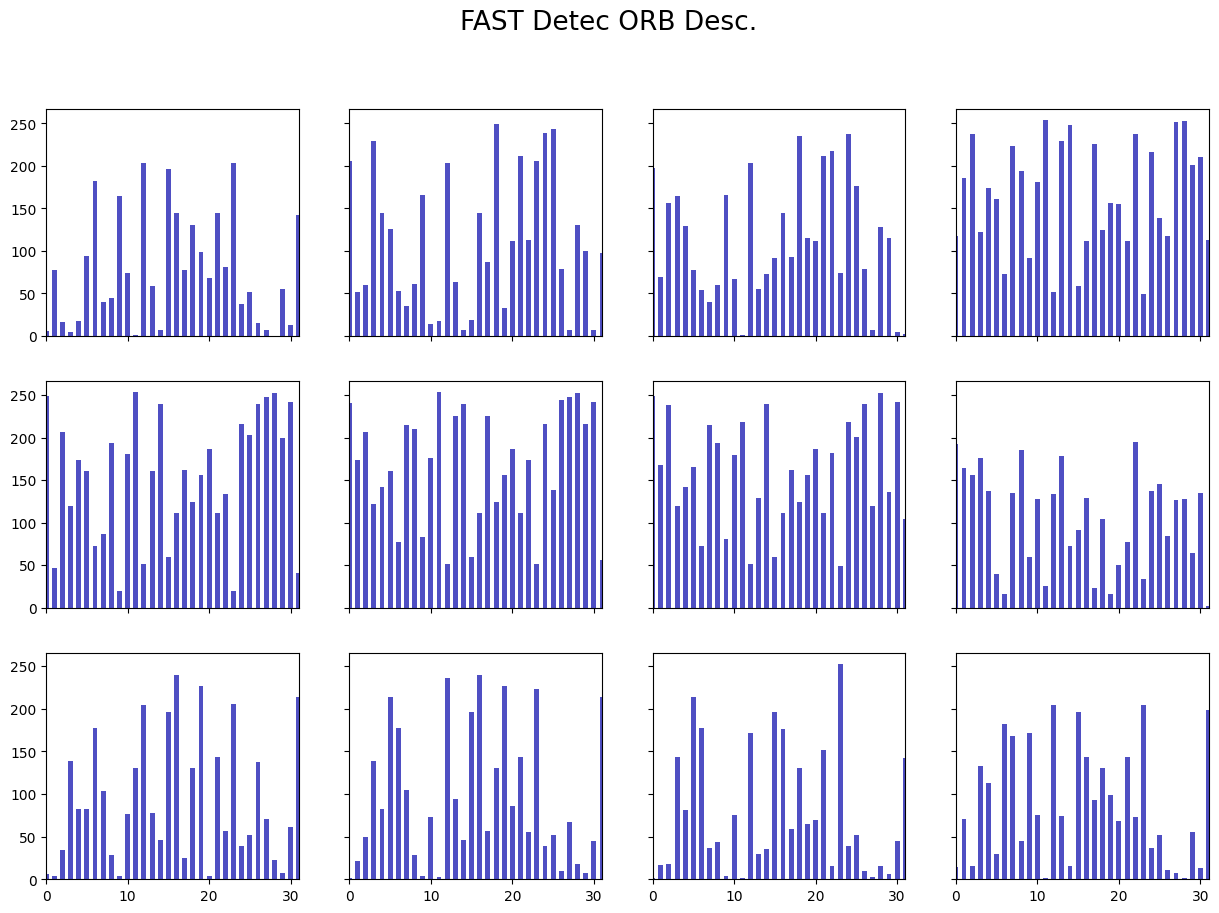

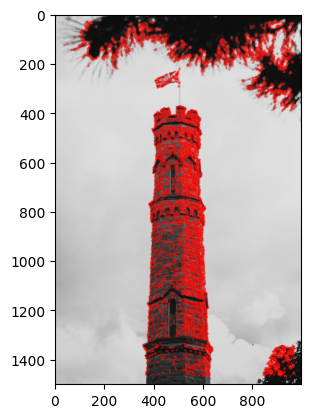

In [ ]:
imgFast = cv2.imread('img/tower2.jpg',0)

thre = 15
fast = cv2.FastFeatureDetector_create(thre)

kpFAST = fast.detect(imgFast,None)

orb = cv2.ORB_create()

kpFAST, desORB = orb.compute(imgFast, kpFAST)

bins = list(range(desORB.shape[1]))
fig, axs = plt.subplots(3,4, figsize=(15,10), sharex='col', sharey='row')
fig.suptitle("FAST Detec ORB Desc.",fontsize=19, va='top')
for i in range(12):
    val= desORB[i]
    pos = i+1
    show_img_ply(bins, val, pos )
    if(i == 11):
        plt.savefig("out/FAST_Det_ORB_Des_Histograma.png",
        dpi=350, bbox_inches='tight')

plt.show()
imgFAST2 = cv2.drawKeypoints(imgFast,kpFAST,np.array([]),
color=(0,5,255), flags=0)
cv2.imwrite("out/Tower_FAST.png", imgFAST2)
plt.imshow(imgFAST2[:, :, ::-1])
plt.show()


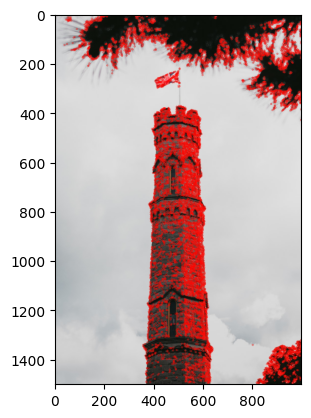

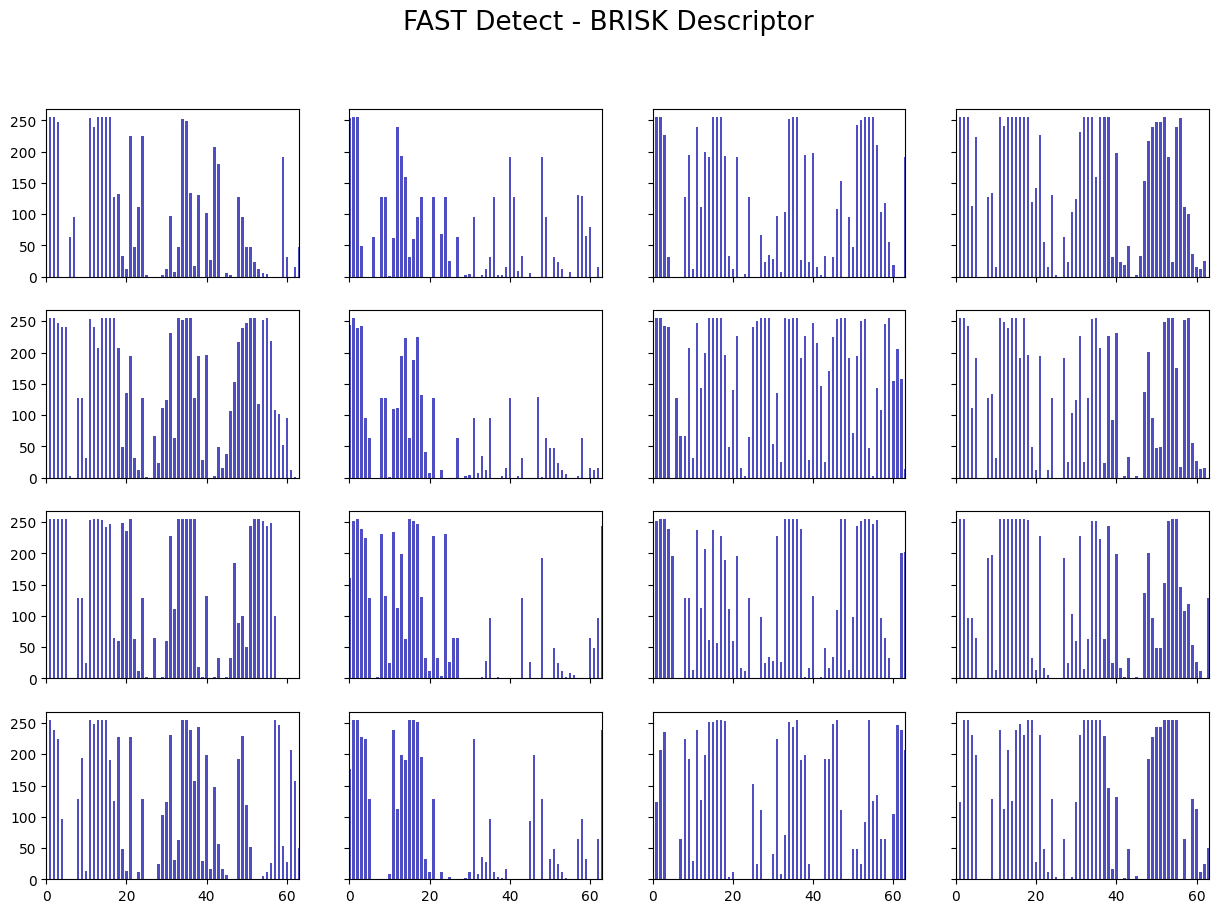

In [ ]:
import cv2
import matplotlib.pyplot as plt

imgPropia = cv2.imread('img/tower2.jpg')

grayPropia = cv2.cvtColor(imgPropia, cv2.COLOR_BGR2GRAY)

thre = 15
fast = cv2.FastFeatureDetector_create(thre)
kpFAST = fast.detect(grayPropia, None)


detectorBRISK = cv2.BRISK_create()
keypointsBRISK, descriptorsBRISK = detectorBRISK.detectAndCompute(grayPropia, None)

imgPropiaWithKeypoints = cv2.drawKeypoints(imgPropia, kpFAST, None, color=(0, 5, 255), flags=0)
cv2.imwrite("out/Propia_FAST.png", imgPropiaWithKeypoints)
plt.imshow(imgPropiaWithKeypoints[:, :, ::-1])
plt.show()

bins = list(range(descriptorsBRISK.shape[1]))
fig, axs = plt.subplots(4, 4, figsize=(15, 10), sharex='col', sharey='row')
fig.suptitle("FAST Detect - BRISK Descriptor", fontsize=19, va='top')
for i in range(min(16, len(keypointsBRISK))):
    val = descriptorsBRISK[i]
    row = i // 4 
    col = i % 4  
    axs[row, col].bar(bins, val, width=0.6, color='#0504aa', alpha=0.7)
    axs[row, col].set_xlim(min(bins), max(bins))

plt.savefig("out/FAST_BRISK_Descriptor_Histograms.png", dpi=350, bbox_inches='tight')
plt.show()

In [2]:
img = cv2.imread('img/shapes.jpg')
bilateral_blur = cv2.bilateralFilter(img,150,50,50)
imgShi, imgHarris = np.copy(bilateral_blur), np.copy(bilateral_blur)
gray = cv2.cvtColor(bilateral_blur, cv2.COLOR_BGR2GRAY)
grayh = np.float32(gray)

In [3]:
corners = cv2.goodFeaturesToTrack(gray, 1000, 0.01, 10)
corners = np.intp(corners)

for i in corners:
    x, y = i.ravel()
    cv2.circle(imgShi, (x, y), 4, (0, 0, 255), -1)

In [ ]:
dst = cv2.cornerHarris(grayh, 3, 3, 0.04)
dst = cv2.dilate(dst, None)
imgHarris[dst > 0.001 * dst.max()] = [0, 255, 0]

cv2.imwrite('out/compare.png', np.hstack((imgHarris, imgShi)))
cv2.imshow('compare', np.hstack((imgHarris, imgShi)))
cv2.waitKey(0)

13

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\mxste\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\mxste\AppData\Local\Programs\Python\Python310\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\mxste\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\mxste\AppData\Local\Programs\Python\Python310\lib\asyncio\selector_events.py", line 120, in _read_from_se

: 

In [ ]:
img1 = cv2.imread('img/sudo.PNG')
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
edges1 = cv2.Canny(gray1,50,150,apertureSize = 3)
lines1 = cv2.HoughLines(edges1,1,np.pi/180,200)

for rho,theta in lines1[0]: 
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img1,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('out/houghlines1.jpg', img1)
plt.imshow(img1[:, :, ::-1])

In [ ]:
img3 = cv2.imread('img/cruci1.jpg')
h,w,c = img3.shape
# Nuevo Tama~no
dsize = (int(w*0.250), int(h*0.250))
# resize image
img4 = cv2.resize(img3, dsize)
gray4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
edges4 = cv2.Canny(gray4, 50, 150, apertureSize = 3)
lines4 = cv2.HoughLinesP(edges4, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)
print(lines4[0])
for line in lines4:
    x1, y1, x2, y2 = line[0]
    cv2.line(img4, (x1,y1), (x2,y2), (0,255,0), 1, cv2.LINE_AA)
cv2.imwrite("out/lineasHough4.png", img4)
plt.subplot(121)
plt.imshow(img4[:, :, ::-1])
plt.subplot(122)
plt.imshow(edges4,cmap = 'gray')
plt.savefig("out/LineasHough_Comparativa.png", dpi=600)
plt.show()

In [ ]:
imgIn = cv2.imread('img/coin.jpg')
h,w,c = imgIn.shape
# Nuevo Tama~no
dsize = (int(w*0.250), int(h*0.250))
# resize image
imgCir = cv2.resize(imgIn, dsize)
src = cv2.medianBlur(imgCir, 5)
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(src, cv2.HOUGH_GRADIENT, 1, 20,
param1=50, param2=80, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # dibujar circulo
    cv2.circle(imgCir, (i[0], i[1]), i[2], (0,255,0), 2)
    # dibujar centro
    cv2.circle(imgCir, (i[0], i[1]), 2, (0,0,255), 3)
cv2.imwrite("out/circulos.png", imgCir)
plt.imshow(imgCir[:, :, ::-1])

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('img/sudo.PNG')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
edges1 = cv2.Canny(gray1, 50, 150, apertureSize=3)
lines1 = cv2.HoughLines(edges1, 1, np.pi/180, 200)

colors = [(0, 0, 255), (0, 255, 0), (255, 0, 0), (255, 255, 0),
          (255, 0, 255), (0, 255, 255), (128, 0, 0), (0, 128, 0),
          (0, 0, 128), (128, 128, 0)]

for line in lines1:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    color = colors[np.random.randint(0, len(colors))]

    cv2.line(img1, (x1, y1), (x2, y2), color, 2)

cv2.imwrite('out/houghlines1.jpg', img1)
plt.imshow(img1[:, :, ::-1])
plt.show()


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgIn = cv2.imread('img/Problema2.jpg')

h, w, c = imgIn.shape
dsize = (int(w * 0.250), int(h * 0.250))
imgCir = cv2.resize(imgIn, dsize)

src = cv2.medianBlur(imgCir, 5)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=50, param2=80, minRadius=0, maxRadius=0)

if circles is not None:
    circles = np.uint16(np.around(circles))

    num_circles = len(circles[0])
    cols = 4
    rows = (num_circles // cols) + 1

    fig, axs = plt.subplots(rows, cols, figsize=(15, 10))

    for i, circle in enumerate(circles[0]):
        x, y, radius = circle
        center = (x, y)

        cv2.circle(imgCir, center, radius, (0, 0, 255), 2)

        cv2.circle(imgCir, center, 2, (0, 255, 255), 3)

        ax = axs[i // cols, i % cols]
        ax.imshow(imgCir[y - radius:y + radius, x - radius:x + radius, ::-1])
        ax.axis('off')

    plt.savefig("out/Deteccion_Circulos.png", dpi=600)
    plt.show()

KeyboardInterrupt: 

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgIn = cv2.imread('img/platos.png')
h,w,c = imgIn.shape
# Nuevo Tama~no
dsize = (int(w*0.250), int(h*0.250))
# resize image
imgCir = cv2.resize(imgIn, dsize)
src = cv2.medianBlur(imgCir, 5)
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(src, cv2.HOUGH_GRADIENT, 1, 20,
param1=50, param2=80, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # dibujar circulo
    cv2.circle(imgCir, (i[0], i[1]), i[2], (0,255,0), 2)
    # dibujar centro
    cv2.circle(imgCir, (i[0], i[1]), 2, (0,0,255), 3)
cv2.imwrite("out/circulos.png", imgCir)
plt.imshow(imgCir[:, :, ::-1])


TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable rint method